# Assignment 2 Solution

This assignment is collaborated by **Jingting Dai** and **Hongjie Guan**. **Jingting finished A02.1 and Hongjie finished A02.2.** The batch import function is written by Hongjie and the batch randomized function is written by Jingting.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'gml'in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split("_",1)[1].split(".")[0] 
            print("dataset named "+item_name+" imported")
            d["g_{0}".format(item_name)] = nx.read_gml(item_path)
    print("finish importing")
    return d

In [5]:
d_gs = import_datasets('data')   

dataset named AstroPh imported
dataset named celegansInteractomes imported
dataset named chess imported
dataset named CondMat imported
dataset named dolphins imported
dataset named eu_airlines imported
dataset named facebook imported
dataset named florentine_families imported
dataset named game_thrones imported
dataset named internet imported
dataset named jazz_collab imported
dataset named terrorists imported
finish importing


# A02.1 Average degree of the nearest neighbours
Task: For each dataset 𝒢, randomise it to obtain a network
𝒢𝑟𝑛𝑑 and explore their assortativity properties

## 1. Plot the average degree of the nearest neighbours 𝑘𝑛𝑛(𝑘) as a function of the vertices degree 𝑘



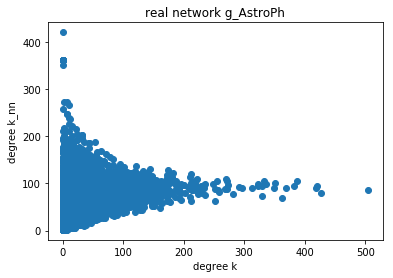

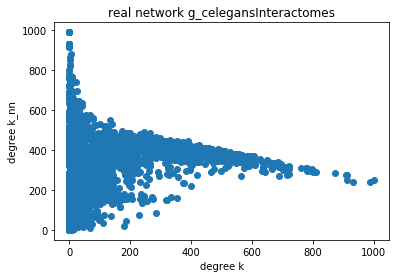

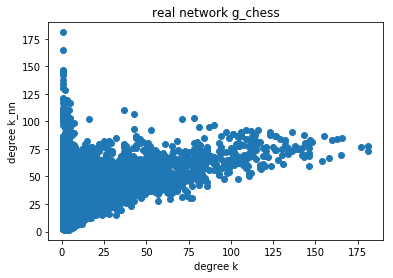

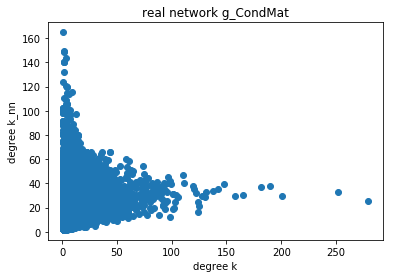

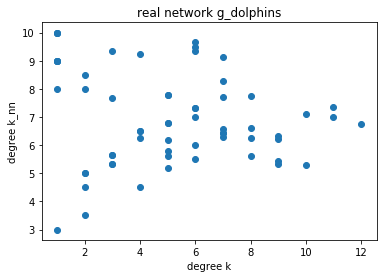

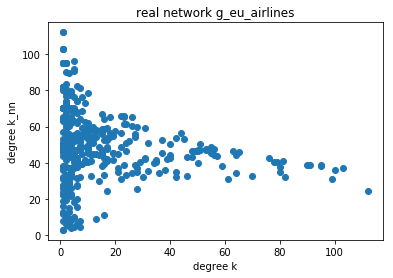

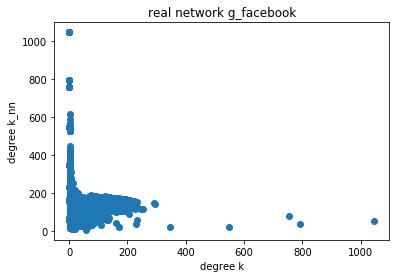

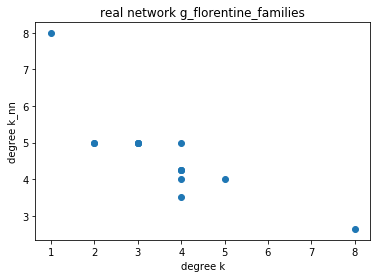

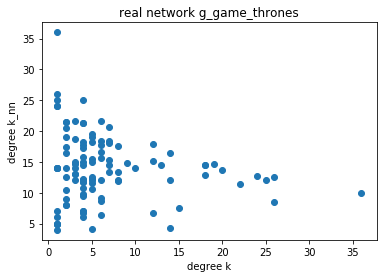

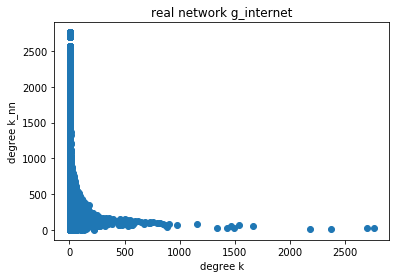

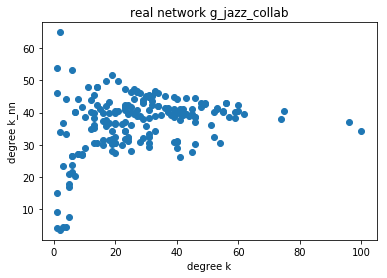

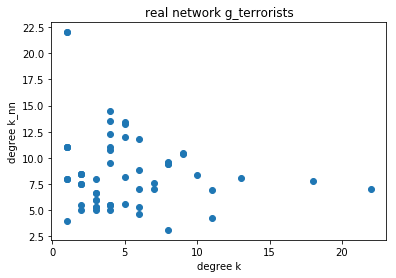

In [6]:
#plot knn(k) for each real networks
for i in d_gs:
    k = [d_gs[i].degree()[j] for j in d_gs[i]]
    avg_nb_k = list(nx.average_neighbor_degree(d_gs[i]).values())
    plt.scatter(k,avg_nb_k)
    plt.xlabel('degree k')
    plt.ylabel('degree k_nn')
    plt.title('real network ' + i)
    plt.show()

In [7]:
#randomise function
#input must be imported gml dictionary
def randomise(networks):
    d={}
    for i in networks:
        d["grnd_{0}".format(i)] = nx.algorithms.smallworld.random_reference(
            networks[i],niter = 5, connectivity=False)
    return d

In [8]:
#randomised datasets dictionary
rnd_gs = randomise(d_gs)

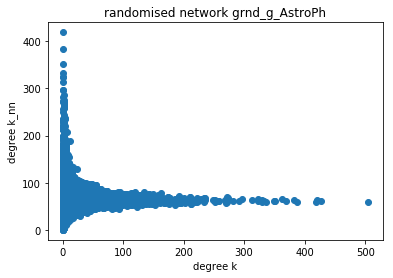

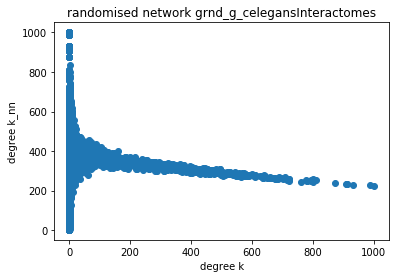

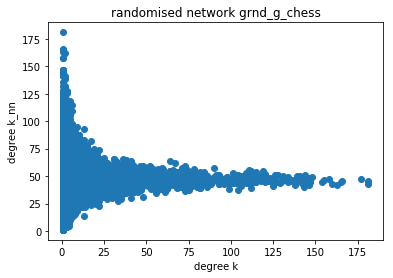

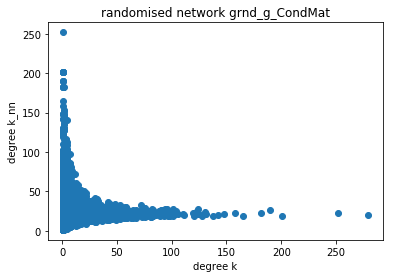

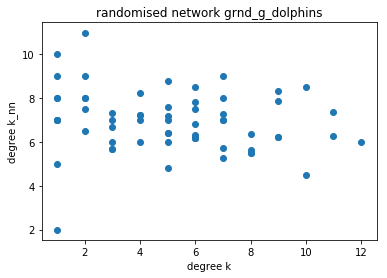

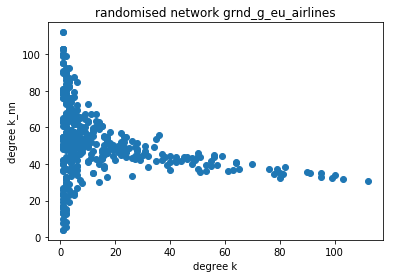

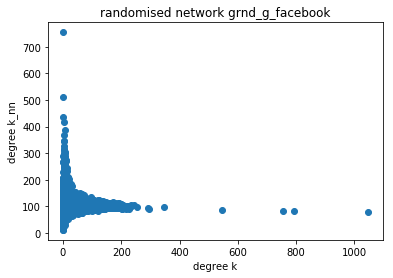

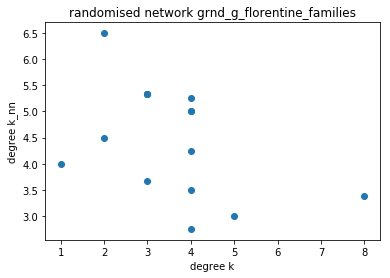

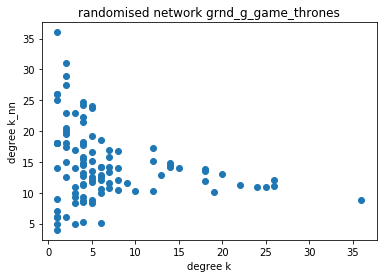

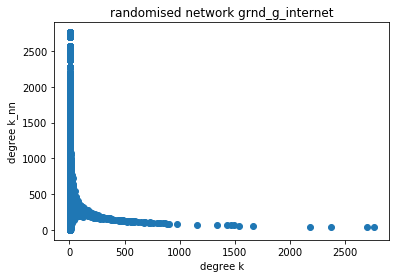

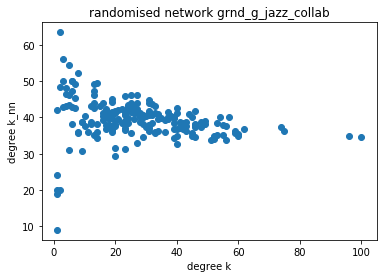

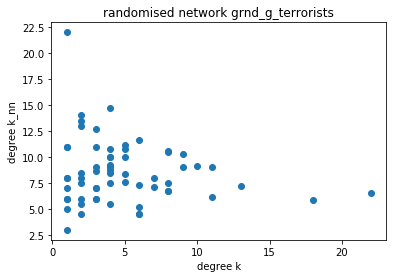

In [9]:
#plot knn(k) for each randomised networks
for i in rnd_gs:
    k_rnd = [rnd_gs[i].degree()[j] for j in rnd_gs[i]]
    avg_nb_k_rnd = list(nx.average_neighbor_degree(rnd_gs[i]).values())
    plt.scatter(k_rnd,avg_nb_k_rnd)
    plt.xlabel('degree k')
    plt.ylabel('degree k_nn')
    plt.title('randomised network ' + i)
    plt.show()

## 2. Compute the assortativity coefficient of the real network

In [10]:
#compute assortativity coefficient of real network and store in dictionary
d_real = {}
for i in d_gs:
    d_real[i] = nx.degree_assortativity_coefficient(d_gs[i])

In [11]:
d_real

{'g_AstroPh': 0.2013170612737268,
 'g_celegansInteractomes': 0.15169796960230708,
 'g_chess': 0.3705153782729767,
 'g_CondMat': 0.12528250398544846,
 'g_dolphins': -0.04359402821531252,
 'g_eu_airlines': -0.15180413274193827,
 'g_facebook': 0.0635772291856496,
 'g_florentine_families': -0.4786286731967932,
 'g_game_thrones': -0.13076968366930292,
 'g_internet': -0.21486656615730243,
 'g_jazz_collab': 0.02023739927504758,
 'g_terrorists': -0.08047566178575724}

## 3. Compute the assortativity coefficient of the randomised network

In [12]:
#compute assortativity coefficient of randomised network and store in dictionary
d_rnd = {}
for i in rnd_gs:
    d_rnd[i] = nx.degree_assortativity_coefficient(rnd_gs[i])

In [13]:
d_rnd

{'grnd_g_AstroPh': -0.01349071747226062,
 'grnd_g_celegansInteractomes': -0.17760976295557668,
 'grnd_g_chess': -0.011004468672609489,
 'grnd_g_CondMat': -0.007903608506262169,
 'grnd_g_dolphins': -0.07408300232844789,
 'grnd_g_eu_airlines': -0.219090820069526,
 'grnd_g_facebook': -0.04542621650326107,
 'grnd_g_florentine_families': -0.31032947462154886,
 'grnd_g_game_thrones': -0.16625631313998365,
 'grnd_g_internet': -0.1973430941500815,
 'grnd_g_jazz_collab': -0.08657066274023749,
 'grnd_g_terrorists': -0.14245972725558753}

# A02.2 Clustering and randomisation
For each dataset 𝒢, randomise it to obtain a network 𝒢𝑟𝑛𝑑
and explore their clustering properties

## 1. Plot the degree distribution in double-logscale and mark with a vertical line the average degree ⟨𝑘⟩



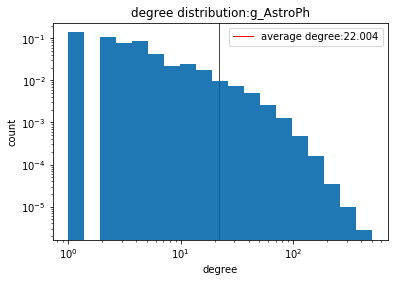

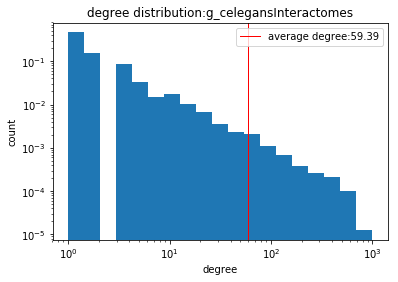

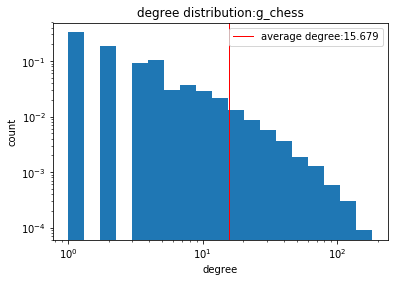

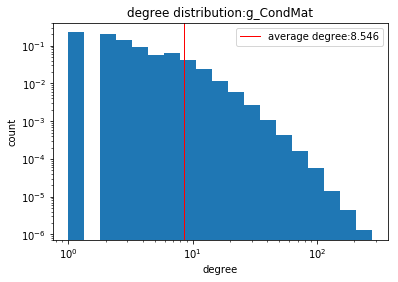

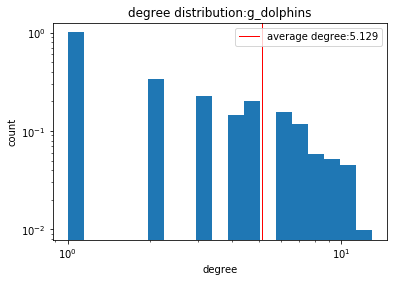

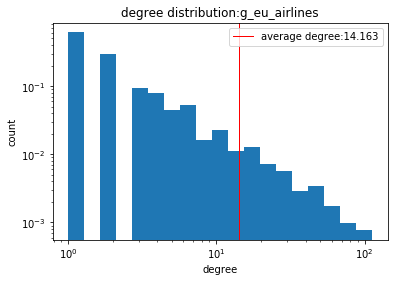

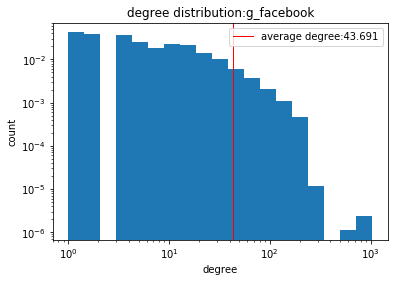

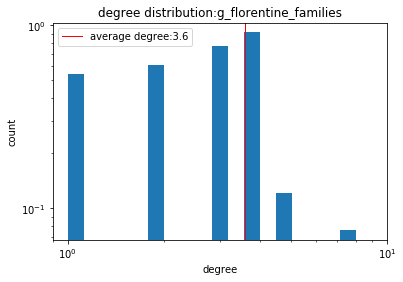

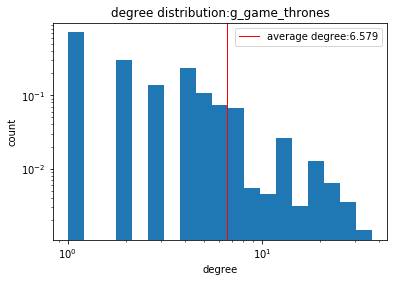

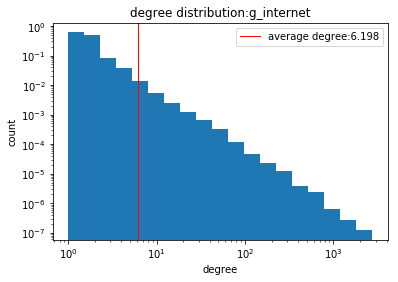

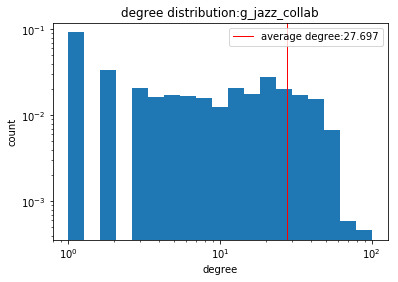

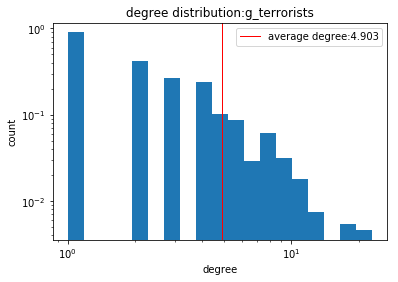

In [14]:
for k,g in d_gs.items():
    g_degrees = g.degree()
    g_degree_list = [ g_degrees[i] for i in g.nodes() ]
    my_bins = np.logspace(np.log10(min(g_degree_list)),np.log10(max(g_degree_list) +1), 20) 
    plt.hist(g_degree_list, bins = my_bins,density = True)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('degree')
    plt.ylabel('count')
    avg = round(sum(g_degree_list)/len(g_degree_list),3)
    plt.axvline(avg, color='r', linestyle='-', linewidth=1,label="average degree:{}".format(avg))
    plt.title("degree distribution:{}".format(k))
    plt.legend()
    plt.show()

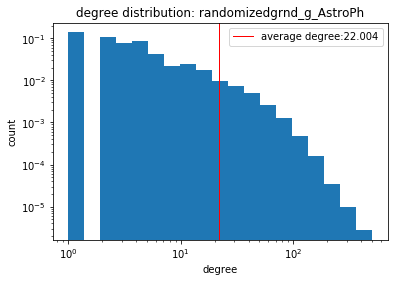

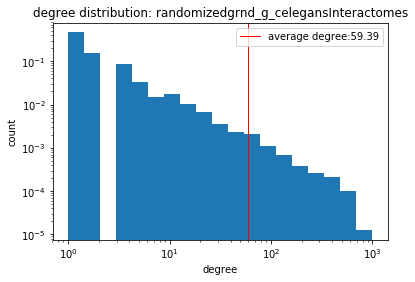

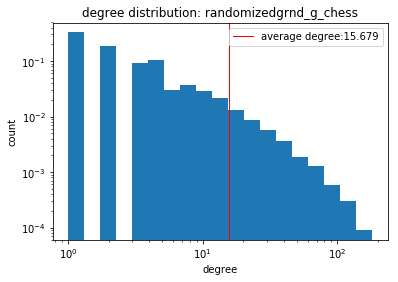

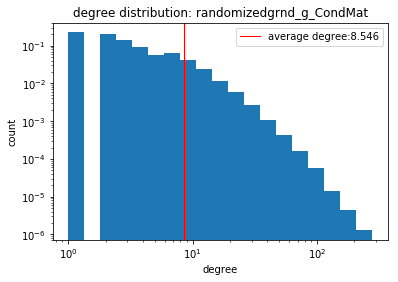

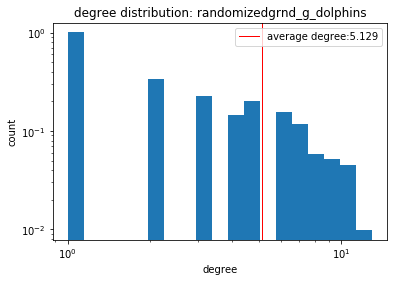

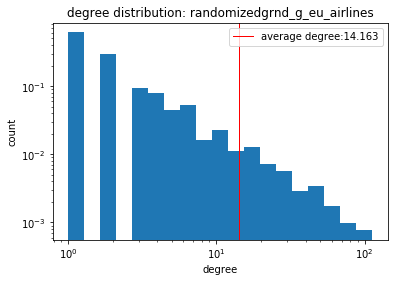

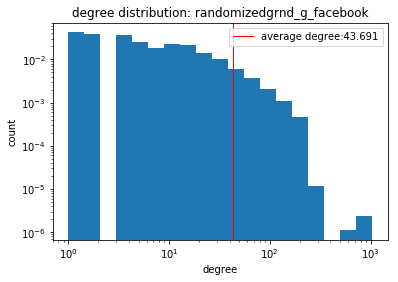

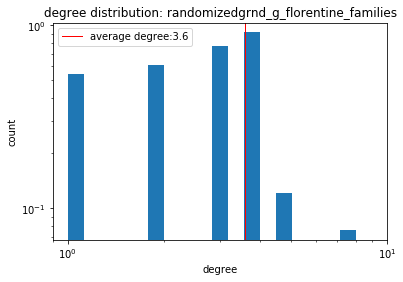

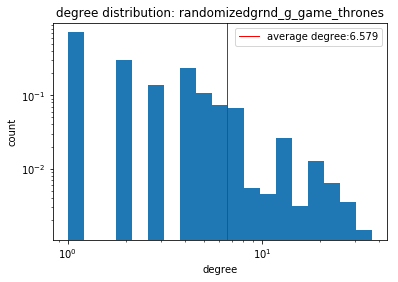

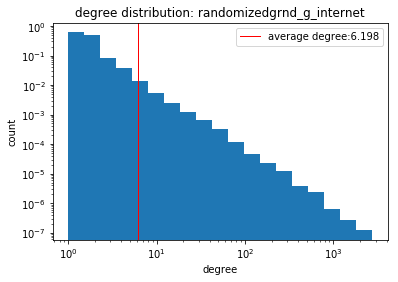

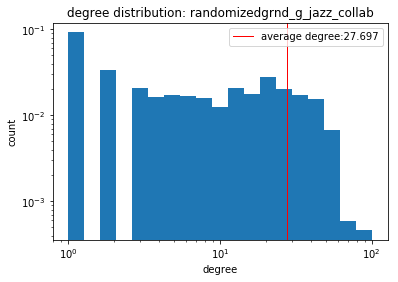

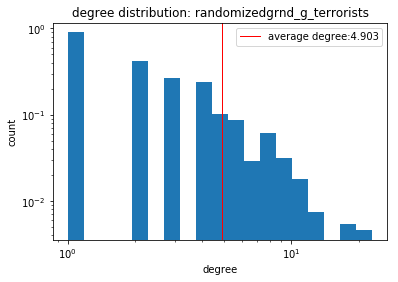

In [15]:
for k,g in rnd_gs.items():
    g_degrees = g.degree()
    g_degree_list = [ g_degrees[i] for i in g.nodes() ]
    my_bins = np.logspace(np.log10(min(g_degree_list)),np.log10(max(g_degree_list) +1), 20) 
    plt.hist(g_degree_list, bins = my_bins,density = True)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('degree')
    plt.ylabel('count')
    avg = round(sum(g_degree_list)/len(g_degree_list),3)
    plt.axvline(avg, color='r', linestyle='-', linewidth=1,label="average degree:{}".format(avg))
    plt.title("degree distribution: randomized{}".format(k))
    plt.legend()
    plt.show()

It is shown that after randomization. The degree distribution will not change, and hence the average degree will not change neither.

## 2. For each node, compute the clustering coefficient in the graphs 𝒢 (denoted by 𝐶(𝑖)) and 𝒢𝑟𝑛𝑑 (denoted as 𝐶𝑟𝑛𝑑(𝑖))

In [16]:
d_cc={}
for name,gragh in d_gs.items():
    c = nx.clustering(gragh)
    d_cc[name]=c

In [17]:
d_cc

{'g_AstroPh': {'0': 0.6921373200442967,
  '1': 0.7333333333333333,
  '2': 0.6579710144927536,
  '3': 0.8043010752688172,
  '4': 0.4397163120567376,
  '5': 0.9137931034482759,
  '6': 0.8409090909090909,
  '7': 0.6828609986504723,
  '8': 0.6699857752489331,
  '9': 0.7540322580645161,
  '10': 0.6816816816816816,
  '11': 0.5526024363233666,
  '12': 0.4995169082125604,
  '13': 1.0,
  '14': 1.0,
  '15': 0.6699857752489331,
  '16': 0.633816425120773,
  '17': 0.8043010752688172,
  '18': 1.0,
  '19': 1.0,
  '20': 1.0,
  '21': 0.5458823529411765,
  '22': 0.5811764705882353,
  '23': 0.5811764705882353,
  '24': 1.0,
  '25': 0.7520161290322581,
  '26': 1.0,
  '27': 1.0,
  '28': 0.7463054187192119,
  '29': 1.0,
  '30': 0.6828609986504723,
  '31': 0.2408912978018669,
  '32': 0.6828609986504723,
  '33': 1.0,
  '34': 0.3955579058699101,
  '35': 1.0,
  '36': 1.0,
  '37': 0.627906976744186,
  '38': 1.0,
  '39': 1.0,
  '40': 1.0,
  '41': 0.5811764705882353,
  '42': 1.0,
  '43': 0.8,
  '44': 1.0,
  '45': 1

In [18]:
d_rnd_cc={}
for name,gragh in rnd_gs.items():
    c = nx.clustering(gragh)
    d_rnd_cc[name]=c

In [19]:
d_rnd_cc

{'grnd_g_AstroPh': {'0': 0.01107419712070875,
  '1': 0.004761904761904762,
  '2': 0.014492753623188406,
  '3': 0.021505376344086023,
  '4': 0.015070921985815602,
  '5': 0.012315270935960592,
  '6': 0.013257575757575758,
  '7': 0.010796221322537112,
  '8': 0.008534850640113799,
  '9': 0.004032258064516129,
  '10': 0.010510510510510511,
  '11': 0.006644518272425249,
  '12': 0.007729468599033816,
  '13': 0.006666666666666667,
  '14': 0.01,
  '15': 0.008534850640113799,
  '16': 0.002898550724637681,
  '17': 0.015053763440860216,
  '18': 0.006666666666666667,
  '19': 0.006666666666666667,
  '20': 0.01,
  '21': 0.01019607843137255,
  '22': 0.010980392156862745,
  '23': 0.00784313725490196,
  '24': 0.013333333333333334,
  '25': 0.016129032258064516,
  '26': 0.02,
  '27': 0.013333333333333334,
  '28': 0.012315270935960592,
  '29': 0.013333333333333334,
  '30': 0.018893387314439947,
  '31': 0.008130081300813009,
  '32': 0.004048582995951417,
  '33': 0.02,
  '34': 0.011634056054997356,
  '35': 0

As shown above, for each graph in the dictionary **d_gs** and **rnd_gs**, we calculated a clustering coefficients for each node. So we form a dictionay called **d_cc**, which contains 12 key-value pairs(key is the name of the original graph and the value is a dictionay containing the nodes number i and $C(i)$ in this graph). Similarly, there is also a dictionary **d_rnd_cc**, which contains 12 key-value pairs(key is the name of the randomized graph and the value is a dictionay containing the nodes number i and $C(i)$ in that graph)

## 3. Do a scatter plot of 𝐶(𝑖) vs. 𝐶𝑟𝑛𝑑(𝑖)

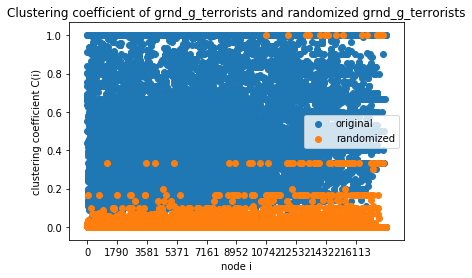

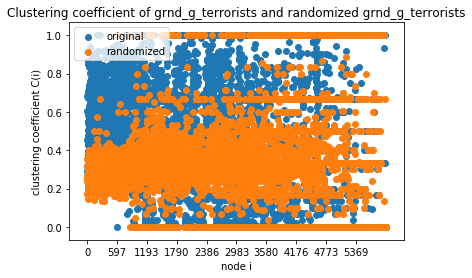

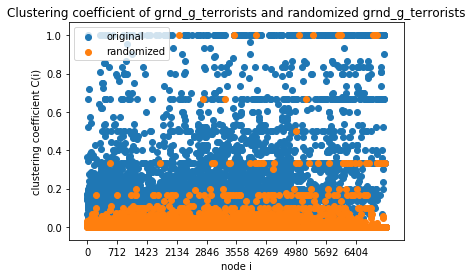

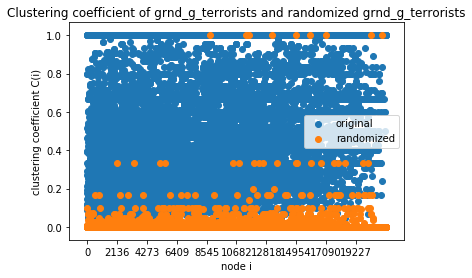

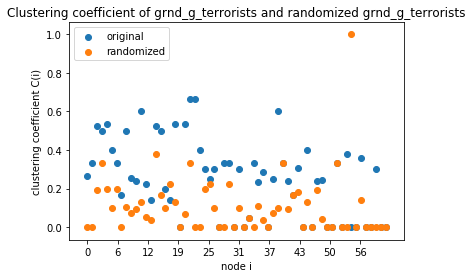

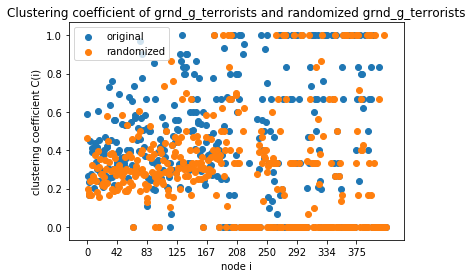

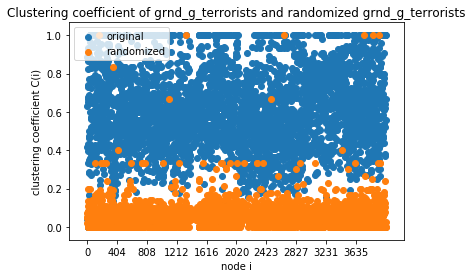

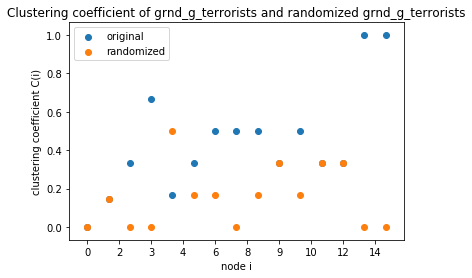

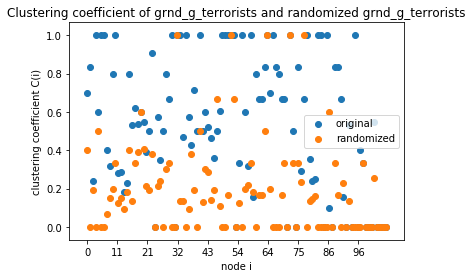

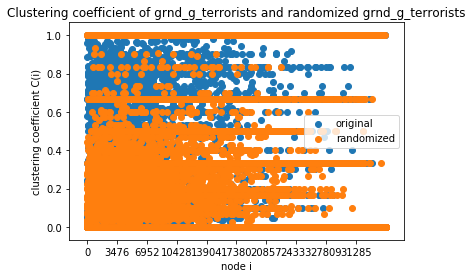

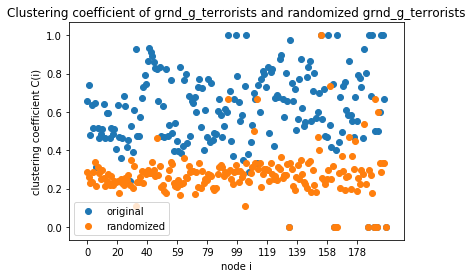

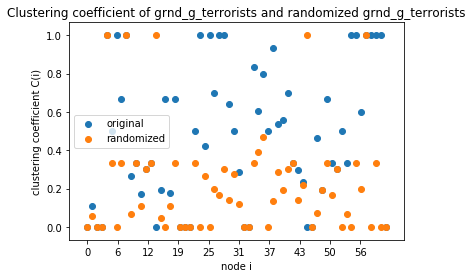

In [20]:
for name,cc in d_cc.items():
    plt.scatter(cc.keys(),cc.values(),label="original")
    plt.scatter(d_rnd_cc['grnd_'+name].keys(),d_rnd_cc['grnd_'+name].values(),label="randomized")
    plt.xticks(np.arange(0, len(cc.keys()), len(cc.keys())/10))
    plt.xlabel('node i')
    plt.ylabel('clustering coefficient C(i)')
    plt.title("Clustering coefficient of {} and randomized {}".format(k,k))
    plt.legend()
    plt.show()

As it is shown in the scatter plot, most of the nodes has the clustering coefficient decreasing, which is consistent with A0.21 where we found that the average degree of the nearest neighbours has a tendency to decrease after randomization.